# ClimateWins Weather Prediction : Random Forest Model

### The following Script Contains:
#### 1. Import Libraries and Data¶
#### 2. Data Wrangling and Reshaping
#### 3. Data Splitting
#### 4. Hyperparameter Optimization (Grid and Random Search)
#### 5. Random Forrest Model Creation with Optimized Hyperparameters
#### 6. Uncovering Feature Importances
#### 7. Modeling & Feature Importance Most Influential Station: Dusseldorf

### 1. Import Libraries and Data

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from numpy import argmax

import warnings
warnings.filterwarnings("ignore")

# Set option to ensure charts are displayed inline in the notebook

%matplotlib inline

In [3]:
# Set display options to show all columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Create path for faster data importation
# Create a path for faster data importation
path = r'C:\Users\kenzy\OneDrive\Desktop\Data Analytics Course 2.0\Basics of Machine Learning for Analysts\10-2024 ClimateWins'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'weather_cleaned.csv'))
pleasant = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
# confirm import
df.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101      1                  7            0.85           1.018   
1  19600102      1                  6            0.84           1.018   
2  19600103      1                  8            0.90           1.018   
3  19600104      1                  3            0.92           1.018   
4  19600105      1                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0              6.5             0.8            10.9                     1   
1              6.1             3.3            10.1                     6   
2              8.5             5.1             9.9                     6   
3              6.3             3.8            10.6                     8   
4              3.0            -0.7             6.0                     8   

   BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
0               0.81             1.0195                       0.88   
1               0.84             1.0172                       0.25   
2               0.77             1.0179                       0.67   
3               0.93             1.0268                       0.25   
4               0.99             1.0286                       0.25   

   BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
0                    0.00                7.0                 3.7   
1                    0.00                0.0                 2.9   
2                    0.00                3.5                 3.1   
3                    0.00                0.0                 2.0   
4                    0.06                0.0                 2.0   

   BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
0               -0.9                7.9                     4   
1                2.2                4.4                     4   
2               -0.5                6.4                     4   
3               -2.0                3.0                     4   
4                0.7                2.8                     4   

   BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
0               0.67              1.017                       0.44   
1               0.67              1.017                       0.18   
2               0.67              1.017                       0.30   
3               0.67              1.017                       0.19   
4               0.67              1.017                       0.19   

   BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
0                    0.01                2.3                 2.4   
1                    0.31                0.0                 2.3   
2                    0.00                0.6                 2.7   
3                    0.00                0.0                 2.0   
4                    0.00                0.0                 2.5   

   BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  DEBILT_humidity  \
0               -0.4                5.1                   7             0.85   
1                1.4                3.1                   8             0.90   
2                1.7                5.3                   6             0.92   
3                0.4                4.4                   8             0.95   
4                1.1                5.3                   6             0.90   

   DEBILT_pressure  DEBILT_global_radiation  DEBILT_precipitation  \
0           1.0032                     0.07                  0.25   
1           1.0056                     0.14 

In [5]:
# check shape
df.shape

(22950, 137)

In [6]:
# check second dataset
pleasant.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [7]:
pleasant.shape

(22950, 16)

### 2. Data Wrangling and Reshaping

In [8]:
# Check data column in datetime format
df.dtypes

DATE                             int64
MONTH                            int64
BASEL_cloud_cover                int64
BASEL_humidity                 float64
BASEL_pressure                 float64
BASEL_global_radiation         float64
BASEL_precipitation            float64
BASEL_sunshine                 float64
BASEL_temp_mean                float64
BASEL_temp_min                 float64
BASEL_temp_max                 float64
BELGRADE_cloud_cover             int64
BELGRADE_humidity              float64
BELGRADE_pressure              float64
BELGRADE_global_radiation      float64
BELGRADE_precipitation         float64
BELGRADE_sunshine              float64
BELGRADE_temp_mean             float64
BELGRADE_temp_min              float64
BELGRADE_temp_max              float64
BUDAPEST_cloud_cover             int64
BUDAPEST_humidity              float64
BUDAPEST_pressure              float64
BUDAPEST_global_radiation      float64
BUDAPEST_precipitation         float64
BUDAPEST_sunshine        

In [9]:
# Convert 'DATE' column to datetime (if it's not already)
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')

In [10]:
df.dtypes

DATE                           datetime64[ns]
MONTH                                   int64
BASEL_cloud_cover                       int64
BASEL_humidity                        float64
BASEL_pressure                        float64
BASEL_global_radiation                float64
BASEL_precipitation                   float64
BASEL_sunshine                        float64
BASEL_temp_mean                       float64
BASEL_temp_min                        float64
BASEL_temp_max                        float64
BELGRADE_cloud_cover                    int64
BELGRADE_humidity                     float64
BELGRADE_pressure                     float64
BELGRADE_global_radiation             float64
BELGRADE_precipitation                float64
BELGRADE_sunshine                     float64
BELGRADE_temp_mean                    float64
BELGRADE_temp_min                     float64
BELGRADE_temp_max                     float64
BUDAPEST_cloud_cover                    int64
BUDAPEST_humidity                 

In [11]:
# Reduce data observations to one decade (2010s)

dfdecade = df[(df['DATE'] >= '2010-01-01') & (df['DATE'] < '2020-01-01')]

In [12]:
dfdecade.shape

(3652, 137)

In [13]:
# Reduce data observations in pleasant data set to one decade
# Change data type
pleasant['DATE'] = pd.to_datetime(pleasant['DATE'], format='%Y%m%d')
pleasant_decade = pleasant[(pleasant['DATE'] >= '2010-01-01') & (pleasant['DATE'] < '2020-01-01')]

In [14]:
pleasant_decade.shape

(3652, 16)

In [15]:
# drop unnecessary columns
dfdecade.drop(['DATE', 'MONTH'], axis=1, inplace=True)
pleasant_decade.drop('DATE', axis = 1, inplace = True)

In [16]:
# confirm drop
dfdecade.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18263                  8            0.93          0.9965   
18264                  3            0.74          1.0193   
18265                  3            0.75          1.0226   
18266                  5            0.83          1.0169   
18267                  7            0.78          1.0073   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18263                    0.18                 0.56             0.0   
18264                    0.58                 0.00             5.2   
18265                    0.61                 0.00             6.3   
18266                    0.48                 0.00             3.7   
18267                    0.53                 0.04             4.4   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
18263              2.9            -0.2             4.8                     6   
18264             -1.5            -4.2             0.4                     8   
18265             -3.2            -6.0             1.1                     7   
18266             -4.9            -8.3            -3.1                     2   
18267             -4.0            -7.1            -1.5                     6   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
18263               0.85             0.9912                       0.64   
18264               0.92             0.9995                       0.25   
18265               0.82             1.0156                       0.25   
18266               0.72             1.0211                       0.86   
18267               0.81             1.0111                       0.39   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
18263                    2.63                3.2                 9.9   
18264                    0.74                0.0                 3.5   
18265                    0.12                0.0                -0.6   
18266                    0.00                6.4                 0.0   
18267                    1.20                0.5                 1.2   

       BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
18263                8.4               13.4                     6   
18264                0.7                8.4                     7   
18265               -1.2                0.7                     6   
18266               -3.6                3.0                     3   
18267                0.0                2.9                     8   

       BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
18263               0.67              1.017                       0.31   
18264               0.67              1.017                       0.38   
18265               0.67              1.017                       0.29   
18266               0.67              1.017                       0.73   
18267               0.67              1.017                       0.19   

       BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
18263                    0.00                0.7                 5.0   
18264                    0.01                1.4                 1.6   
18265                    0.00                0.5                -1.9   
18266                    0.00                7.4                -4.1   
18267                    0.75                0.0                -3.5   

       BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  \
18263                3.6                7.8                   4   
18264                0.1                5.8                   8   
18265               -2.6                0.2                   4   
18266               -5.9               -1.0                   8   
18267               -5.2               -2.6                   7   

       DEBILT_humidity  DEBILT_pressure  DEBILT_global_radiation  \
18263             0.78           1.0026                     0.37   
18264             0.91           1

In [17]:
pleasant_decade.head()

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263                       0                          0   
18264                       0                          0   
18265                       0                          0   
18266                       0                          0   
18267                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   
18264                          0                        0   
18265                          0                        0   
18266                          0                        0   
18267                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   
18264                            0                          0   
18265                            0                          0   
18266                            0                          0   
18267                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   
18264                        0                           0   
18265                        0                           0   
18266                        0                           0   
18267                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   
18264                            0                        0   
18265                            0                        0   
18266                            0                        0   
18267                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   
18264                          0                      0   
18265                          0                      0   
18266                          0                      0   
18267                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
18263                           0                           0   
18264                           0                           0   
18265                           0                           0   
18266                           0                           0   
18267                           0                           0   

       VALENTIA_pleasant_weather  
18263                          0  
18264                          0  
18265                          0  
18266                          0  
18267                          0

In [18]:
# Confirm shape
dfdecade.shape

(3652, 135)

In [19]:
# Verify Shape
pleasant_decade.shape

(3652, 15)

In [20]:
# reshape data
X = dfdecade

In [21]:
y = pleasant_decade

In [22]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [23]:
X.shape

(3652, 135)

In [24]:
y.shape

(3652, 15)

### 3. Data Splitting

In [25]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [26]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


### 4. Hyperparameter Optimization (Grid and Random Search)

#### Grid Search

In [27]:
# Create a RF classifier

clf = RandomForestClassifier()

In [28]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[15, 50, 100, 135], 
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [29]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 5.1618499477704365 minutes


In [30]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.6443957648776927


#### Random Search

In [31]:
# Define random search

rs_space = {
    'max_depth': list(np.arange(10, 100, step=10)) + [None],
    'n_estimators': np.arange(150, 250, step=25),  # Focusing on around the best n_estimators
    'max_features': randint(30, 70),  # Adjusting to a narrower range based on grid search
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': randint(1, 4), 
    'min_samples_split': np.arange(2, 10, step=2) 
}

In [32]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [33]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 1.3074959993362427 minutes


In [34]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.6443957648776927
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': None, 'max_features': 57, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 225}
Best RANDOM search score is: 0.6407447973713034


### 5. Random Forrest Model Creation with Optimized Hyperparameters

In [35]:
# Create a RF classifier with the best results from above
# Grid search provided slighly better accuracy
clf3 = RandomForestClassifier(n_estimators = 200, max_depth=None, max_features=50, min_samples_leaf=1, min_samples_split=2)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_features=50, n_estimators=200)

In [36]:
# Perform predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6659364731653888


In [37]:
class_names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

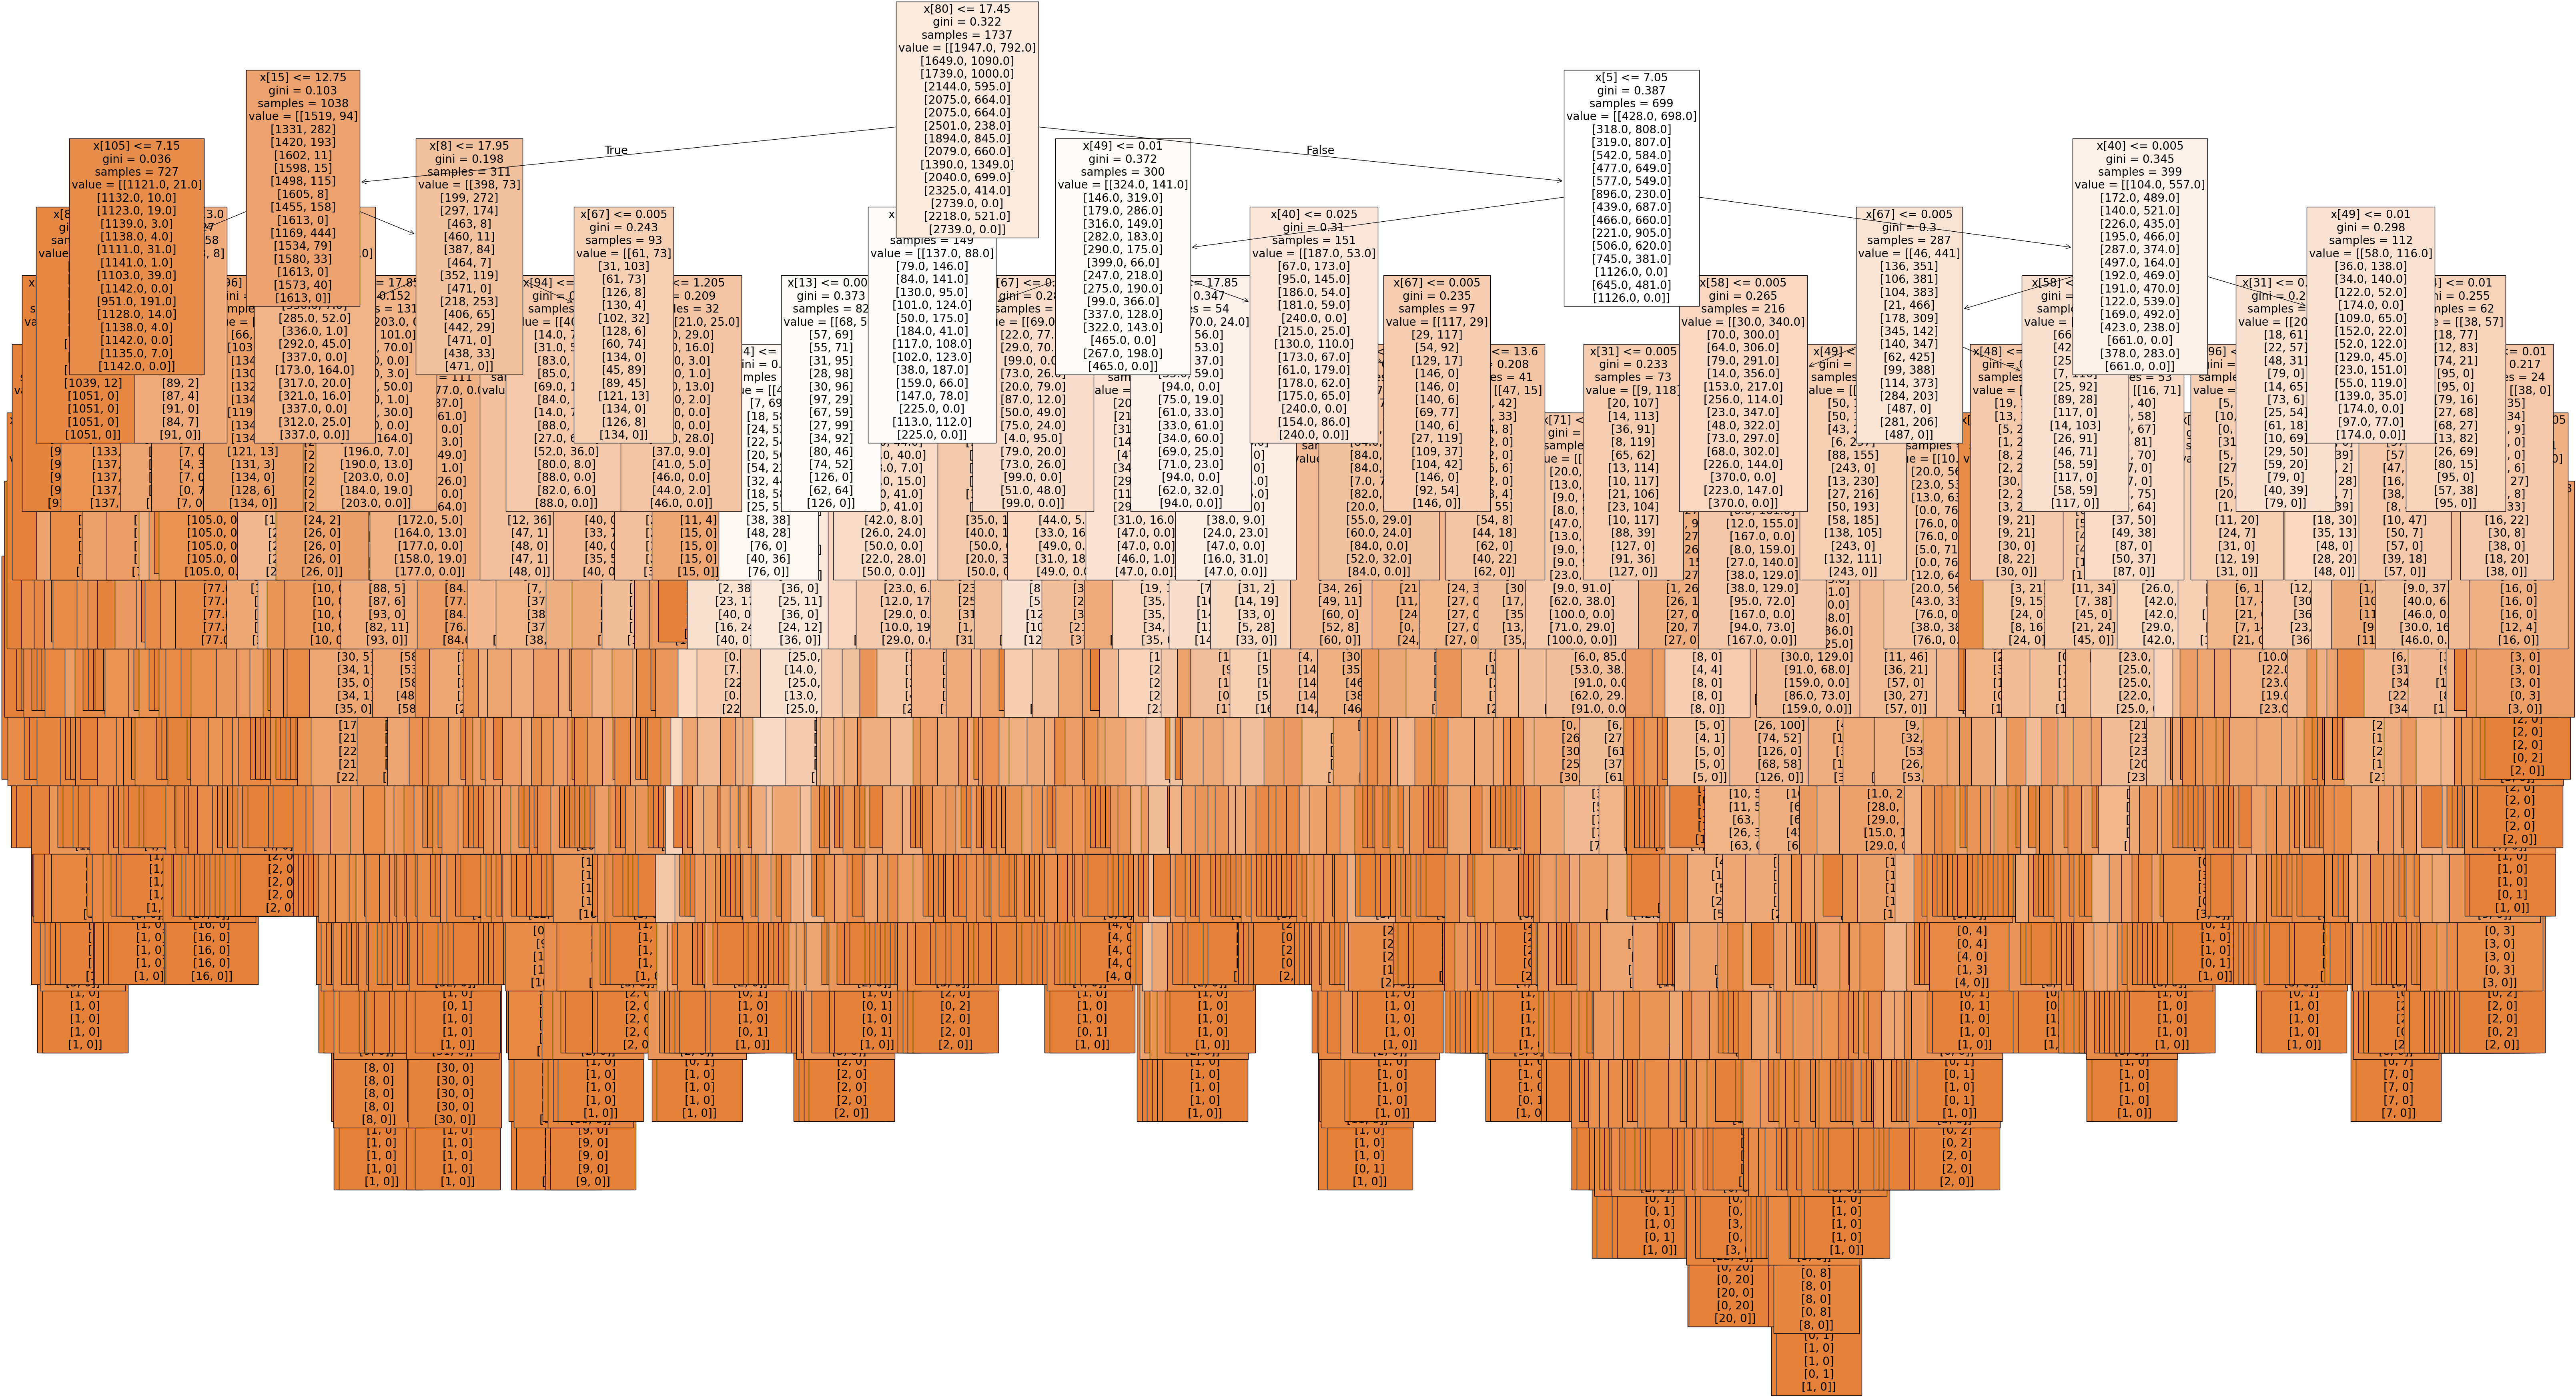

In [38]:
# Plot random forrest
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15],
          class_names=class_names, 
          filled=True, 
          fontsize=20)
plt.show()

In [39]:
fig.savefig(os.path.join(path, '04 Visualizations', 'RF_2010s_Tree15_Optimized.png'), bbox_inches='tight')

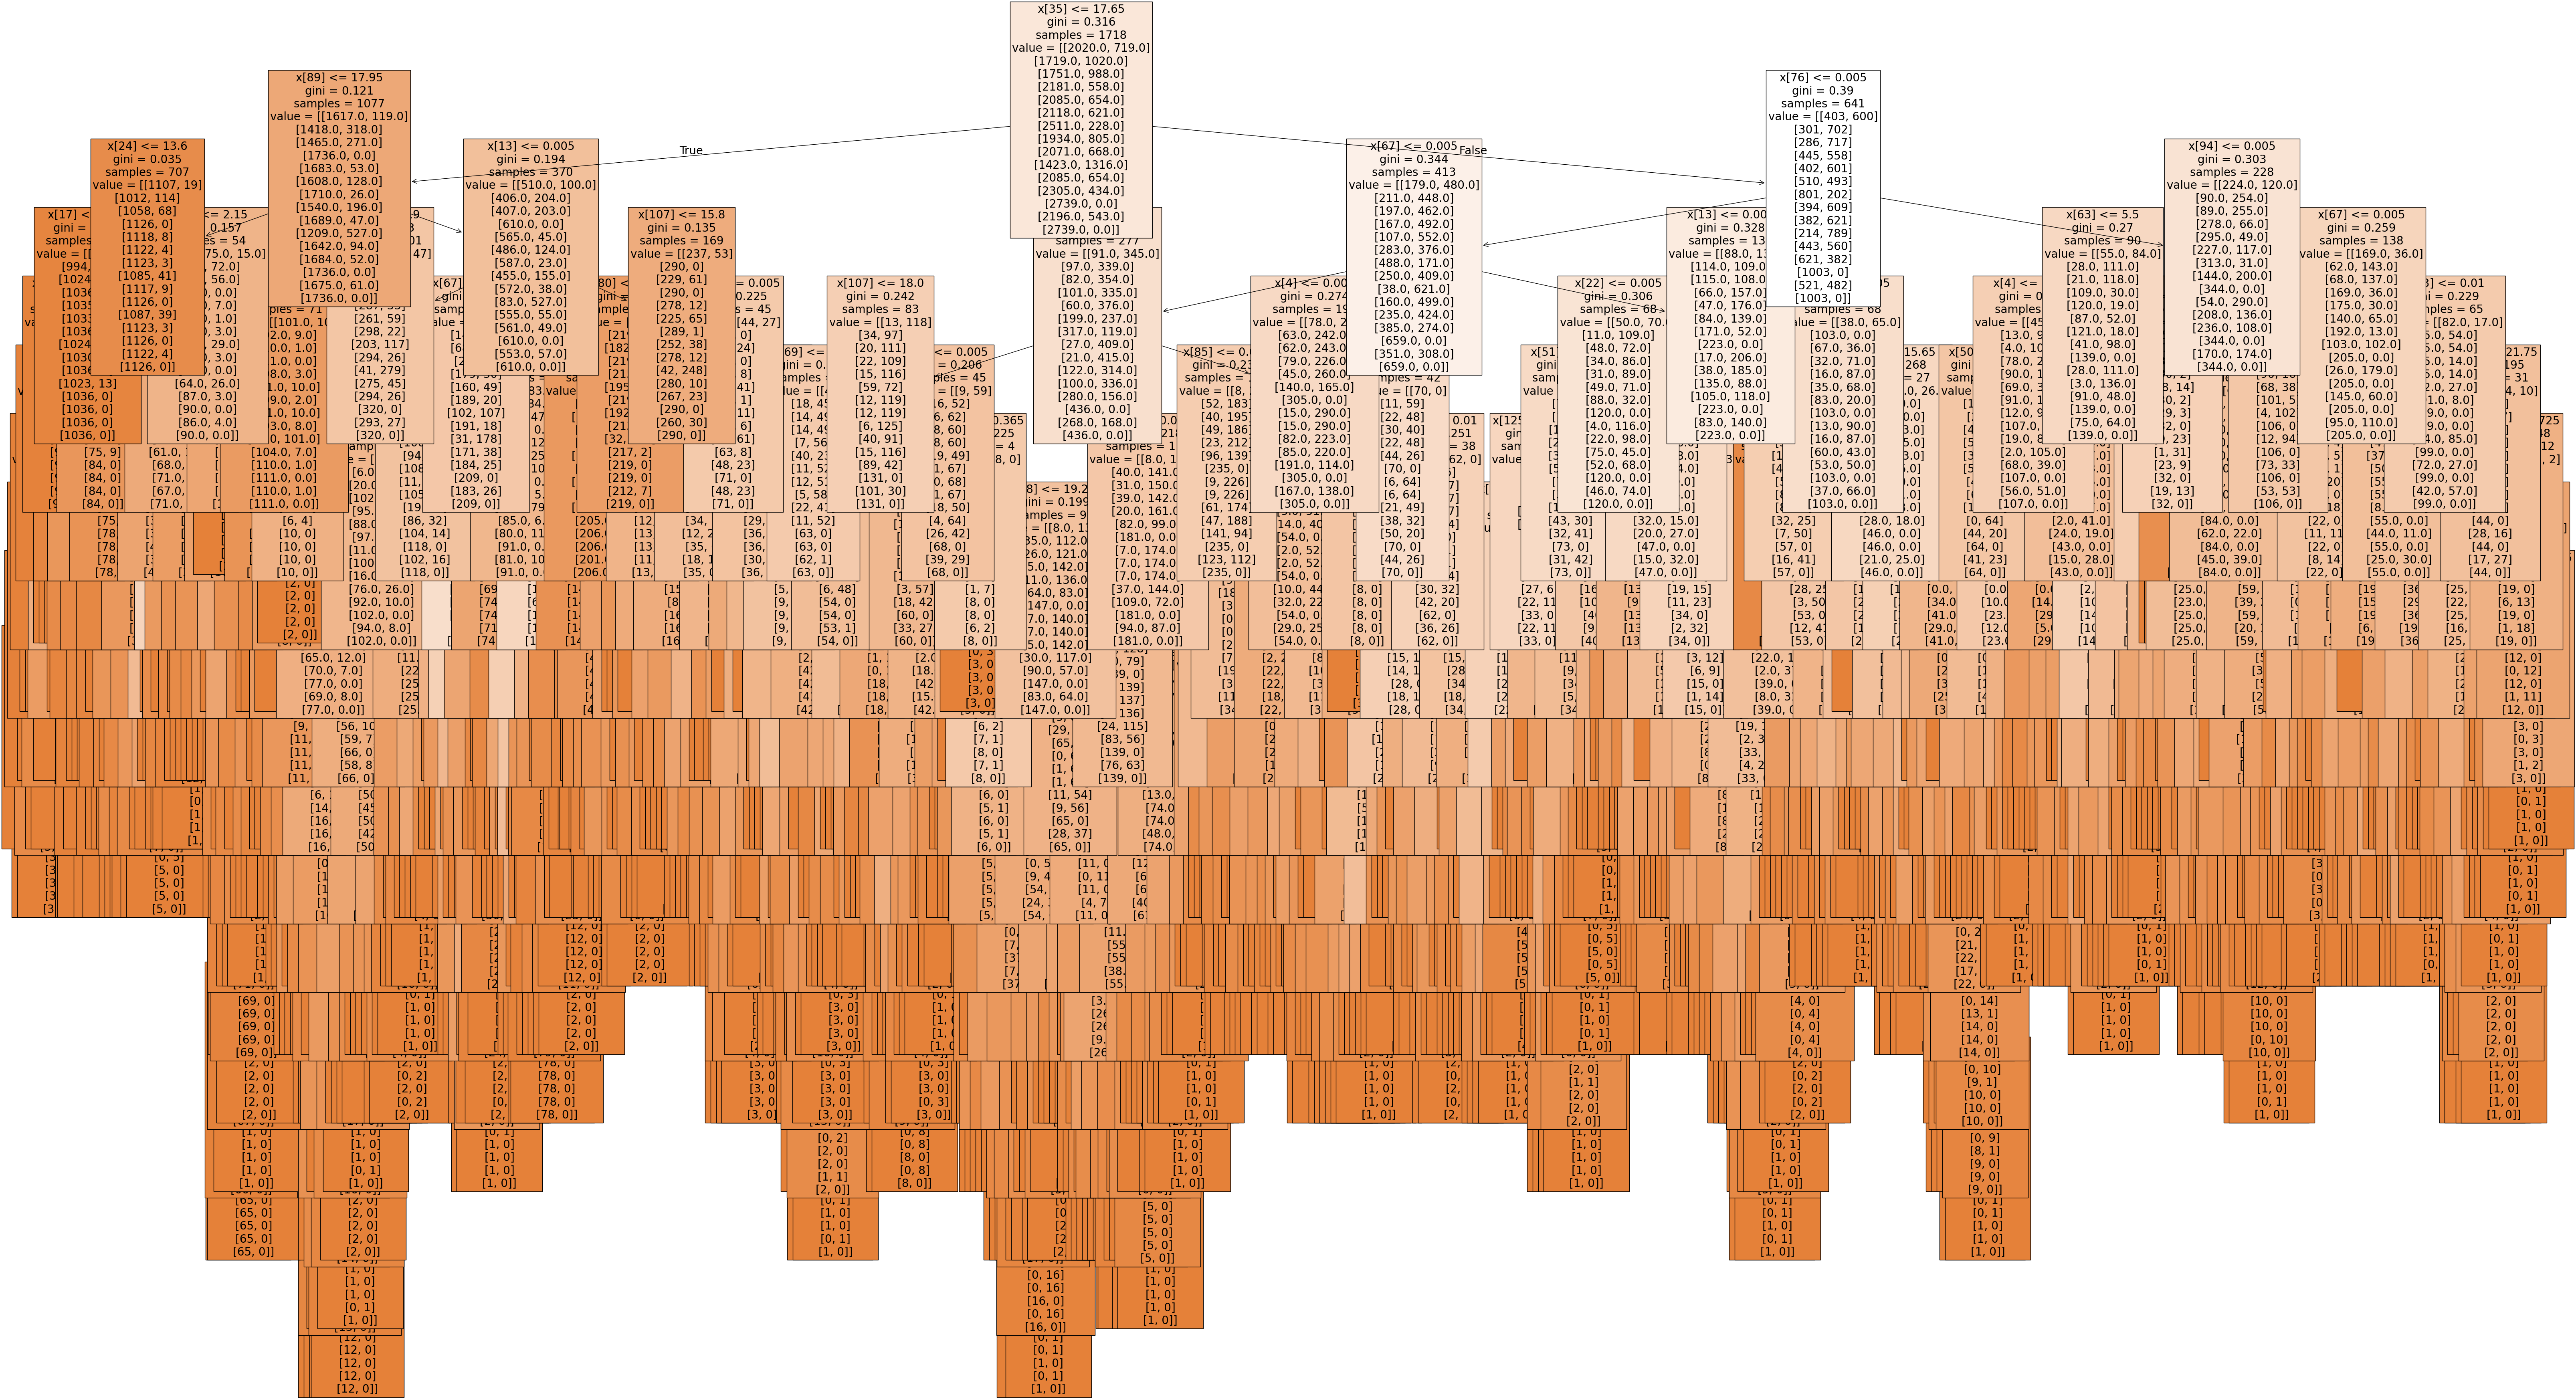

In [40]:
# Call another decision tree for another example
# Plot random forrest
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[80],
          class_names=class_names, 
          filled=True, 
          fontsize=20)
plt.show()

In [41]:
fig.savefig(os.path.join(path, '04 Visualizations', 'RF_2010s_Tree80_optimized.png'), bbox_inches='tight')

### 6. Uncovering Feature Importance

In [42]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(135,)


array([1.56705133e-03, 2.28538384e-03, 2.03279236e-03, 2.15692691e-03,
       2.92719383e-02, 4.91995739e-03, 1.04562530e-02, 1.85769961e-03,
       7.05119589e-02, 2.74810088e-03, 2.32255142e-03, 2.58842328e-03,
       2.13337811e-03, 2.76157512e-02, 2.39379680e-03, 4.05566213e-03,
       2.05810063e-03, 8.14675365e-03, 2.28457644e-04, 0.00000000e+00,
       0.00000000e+00, 8.89229558e-04, 2.43345507e-02, 9.27519717e-04,
       8.23404430e-03, 2.19234186e-03, 1.80912022e-02, 1.58787773e-03,
       2.03261490e-03, 2.39321454e-03, 2.43725183e-03, 2.08791376e-02,
       2.77435896e-03, 2.46640180e-03, 1.98622130e-03, 4.29604001e-02,
       1.38253526e-03, 2.03997505e-03, 2.14421732e-03, 2.43574219e-03,
       3.56945578e-02, 3.05923730e-03, 8.48178297e-03, 1.92787343e-03,
       1.08048370e-01, 1.89784176e-03, 3.01598794e-03, 2.40695901e-03,
       3.40401709e-03, 1.32190298e-02, 3.71823415e-03, 2.95492804e-03,
       2.13429979e-03, 9.35588817e-03, 1.37982983e-03, 1.64596251e-03,
      

In [61]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[3.11405956e-03, 3.18026509e-03, 3.21803874e-03, 2.63822266e-03,
         2.06422890e-02, 7.87385319e-03, 1.35572992e-02, 8.38535681e-03,
         4.70975862e-02],
        [3.24128251e-03, 2.87771999e-03, 3.40614790e-03, 2.12610156e-03,
         1.70973509e-02, 2.71125429e-03, 5.28084282e-03, 3.12373339e-03,
         9.70481286e-03],
        [3.60541985e-04, 0.00000000e+00, 0.00000000e+00, 1.25533022e-03,
         1.49650391e-02, 9.58171193e-04, 2.02084930e-02, 2.72209910e-03,
         1.43022143e-02],
        [2.57546718e-03, 2.48128528e-03, 4.13456905e-03, 3.41324047e-03,
         1.52392445e-02, 4.81565428e-03, 8.28028505e-03, 2.01751016e-03,
         2.39962473e-02],
        [3.25937522e-03, 2.80402929e-03, 3.66780392e-03, 3.58136914e-03,
         2.45071225e-02, 8.62448116e-03, 1.96462246e-02, 4.89617995e-03,
         2.34602140e-02],
        [1.77545608e-03, 3.36421475e-03, 3.62389829e-03, 3.72167249e-03,
         9.86332884e-03, 3.93599077e-03, 4.98235938e-03, 2.26982676

In [44]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[1.56705133e-03, 2.28538384e-03, 2.03279236e-03, 2.15692691e-03,
         2.92719383e-02, 4.91995739e-03, 1.04562530e-02, 1.85769961e-03,
         7.05119589e-02],
        [2.74810088e-03, 2.32255142e-03, 2.58842328e-03, 2.13337811e-03,
         2.76157512e-02, 2.39379680e-03, 4.05566213e-03, 2.05810063e-03,
         8.14675365e-03],
        [2.28457644e-04, 0.00000000e+00, 0.00000000e+00, 8.89229558e-04,
         2.43345507e-02, 9.27519717e-04, 8.23404430e-03, 2.19234186e-03,
         1.80912022e-02],
        [1.58787773e-03, 2.03261490e-03, 2.39321454e-03, 2.43725183e-03,
         2.08791376e-02, 2.77435896e-03, 2.46640180e-03, 1.98622130e-03,
         4.29604001e-02],
        [1.38253526e-03, 2.03997505e-03, 2.14421732e-03, 2.43574219e-03,
         3.56945578e-02, 3.05923730e-03, 8.48178297e-03, 1.92787343e-03,
         1.08048370e-01],
        [1.89784176e-03, 3.01598794e-03, 2.40695901e-03, 3.40401709e-03,
         1.32190298e-02, 3.71823415e-03, 2.95492804e-03, 2.13429979

In [46]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.12505996, 0.05406252, 0.05489735, 0.07951748, 0.16521429,
       0.04210719, 0.02690056, 0.07390781, 0.12723816, 0.07503354,
       0.07425349, 0.04268799, 0.01809229, 0.03795115, 0.00307622])

In [45]:
# Define list of stations names

stations = [
'BASEL',
'BELGRADE',
'BUDAPEST',
'DEBILT',
'DUSSELDORF',
'HEATHROW',
'KASSEL',
'LJUBLJANA',
'MAASTRICHT',
'MADRID',
'MUNCHENB',
'OSLO',
'SONNBLICK',
'STOCKHOLM',
'VALENTIA'

]

In [47]:
important = pd.Series(sumarray, index = stations)
important = important.sort_values(ascending = False)
important

DUSSELDORF    0.165214
MAASTRICHT    0.127238
BASEL         0.125060
DEBILT        0.079517
MADRID        0.075034
MUNCHENB      0.074253
LJUBLJANA     0.073908
BUDAPEST      0.054897
BELGRADE      0.054063
OSLO          0.042688
HEATHROW      0.042107
STOCKHOLM     0.037951
KASSEL        0.026901
SONNBLICK     0.018092
VALENTIA      0.003076
dtype: float64

In [48]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': stations,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


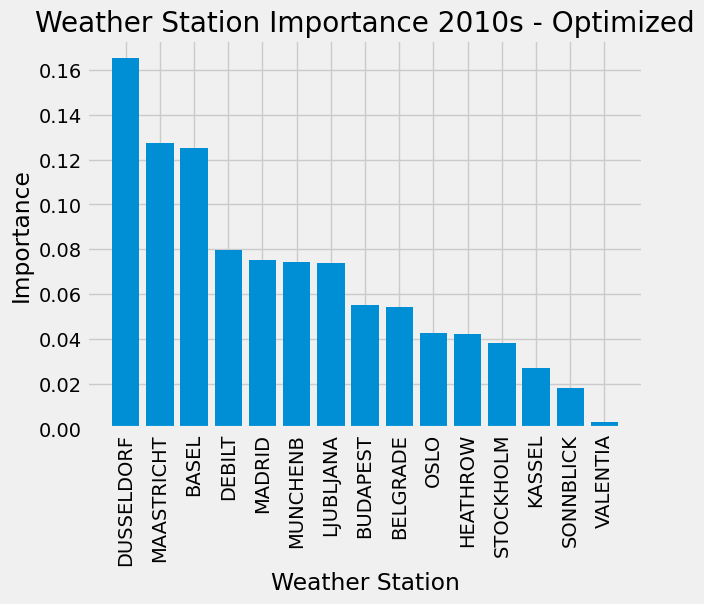

In [49]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(stations)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s - Optimized')

plt.savefig(os.path.join(path, '04 Visualizations', '2010s_feauture_importances_optimized.png'), bbox_inches='tight')

plt.show()

### 6. Modeling & Feature Importance Most Influential Station: Dusseldorf (All Years)

In [50]:
# Reduce datasets to only Dusseldorf
# Get a list of columns related to 'Dusseldorf"
dus_cols = [col for col in df.columns if col.startswith('DUSSELDORF')]
df_dus = df[dus_cols]

In [51]:
df_dus.head()

DUSSELDORF_cloud_cover  DUSSELDORF_humidity  DUSSELDORF_pressure  \
0                       8                 0.83               1.0161   
1                       8                 0.89               1.0161   
2                       7                 0.95               1.0161   
3                       8                 0.86               1.0161   
4                       7                 0.92               1.0161   

   DUSSELDORF_global_radiation  DUSSELDORF_precipitation  DUSSELDORF_sunshine  \
0                         0.12                      0.08                  0.0   
1                         0.18                      0.66                  0.5   
2                         0.12                      0.07                  0.0   
3                         0.12                      0.02                  0.0   
4                         0.12                      0.62                  0.0   

   DUSSELDORF_temp_mean  DUSSELDORF_temp_min  DUSSELDORF_temp_max  
0                  10.0                  7.0                 11.5  
1                   8.2                  7.4                 11.0  
2                   7.1                  6.9                  9.1  
3                   6.8                  3.6                  8.0  
4                   7.7                  6.2                 11.0

In [52]:
# Reduce answers (pleasnt) dataset to only Maastricht
ans_dus = pleasant['DUSSELDORF_pleasant_weather']
ans_dus.head()

0    0
1    0
2    0
3    0
4    0
Name: DUSSELDORF_pleasant_weather, dtype: int64

In [53]:
df_dus.shape

(22950, 9)

##### As we are looking for all years of this data, date and month have not been added in therefore the shape only has 9 columns rather than 11.

In [54]:
ans_dus.shape

(22950,)

##### This is the correct shape

In [55]:
# Create matrices
X2 = df_dus
y2= ans_dus

In [56]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [57]:
X.shape

(22950, 9)

In [58]:
y.shape

(22950,)

In [59]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [60]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [61]:
X_train

array([[  3.    ,   0.63  ,   1.0153, ...,  18.8   ,   9.9   ,  24.    ],
       [  3.    ,   0.75  ,   1.0172, ...,  -3.6   ,  -6.3   ,  -1.2   ],
       [  4.    ,   0.91  ,   1.0108, ...,  -5.4   , -11.9   ,  -2.6   ],
       ...,
       [  8.    ,   0.84  ,   1.0098, ...,   8.6   ,   5.1   ,  10.2   ],
       [  7.    ,   0.77  ,   1.0161, ...,  11.6   ,   8.2   ,  15.3   ],
       [  2.    ,   0.64  ,   1.0243, ...,   7.6   ,   1.    ,  14.    ]])

In [62]:
y_train

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
X_test

array([[ 3.    ,  0.74  ,  1.0161, ..., 12.6   ,  6.9   , 19.5   ],
       [ 7.    ,  0.56  ,  1.0102, ...,  2.2   ,  0.7   ,  5.4   ],
       [ 8.    ,  0.78  ,  1.0077, ..., 18.2   , 17.3   , 20.8   ],
       ...,
       [ 1.    ,  0.8   ,  1.0133, ..., 11.3   ,  4.    , 20.8   ],
       [ 7.    ,  0.77  ,  1.0259, ...,  7.4   ,  6.2   ,  9.1   ],
       [ 8.    ,  0.88  ,  1.0196, ..., 11.4   ,  7.4   , 14.3   ]])

In [64]:
y_test

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

##### Hyperparameter Optimization (Dusseldorf)

##### Grid Search

In [66]:
# Create a RF classifier

clf = RandomForestClassifier()

In [67]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [68]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 0.5245622992515564 minutes


In [69]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 1.0


##### Random Search

In [70]:
# Define random search cv
rs_space = {
    'max_depth': list(np.arange(1, 10, step=1)) + [None],  
    'n_estimators': np.arange(100, 300, step=50),  
    'max_features': randint(2, 5),  
    'criterion': ['gini', 'entropy'],  
    'min_samples_leaf': randint(1, 4),  
    'min_samples_split': np.arange(2, 10, step=2)  
}

In [71]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [72]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=100, scoring='accuracy', verbose=3, n_jobs=-1, cv=5)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Search took 0.4769365628560384 minutes


In [73]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 9, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best RANDOM search score is: 1.0


In [74]:
# Grid search results vs. random search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 1.0
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 9, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best RANDOM search score is: 1.0


#### Running Random Forest with Optimized Search Parameters (Dusseldorf)

In [76]:
# Create a RF classifier
clf4 = RandomForestClassifier(n_estimators = 100, max_depth=3, max_features=7, min_samples_leaf = 2, min_samples_split=2) 
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf4.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=7, min_samples_leaf=2)

In [77]:
# Perform predictions on the test dataset
y_pred4 = clf4.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred4))

Model Accuracy:  1.0


In [78]:
class_names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

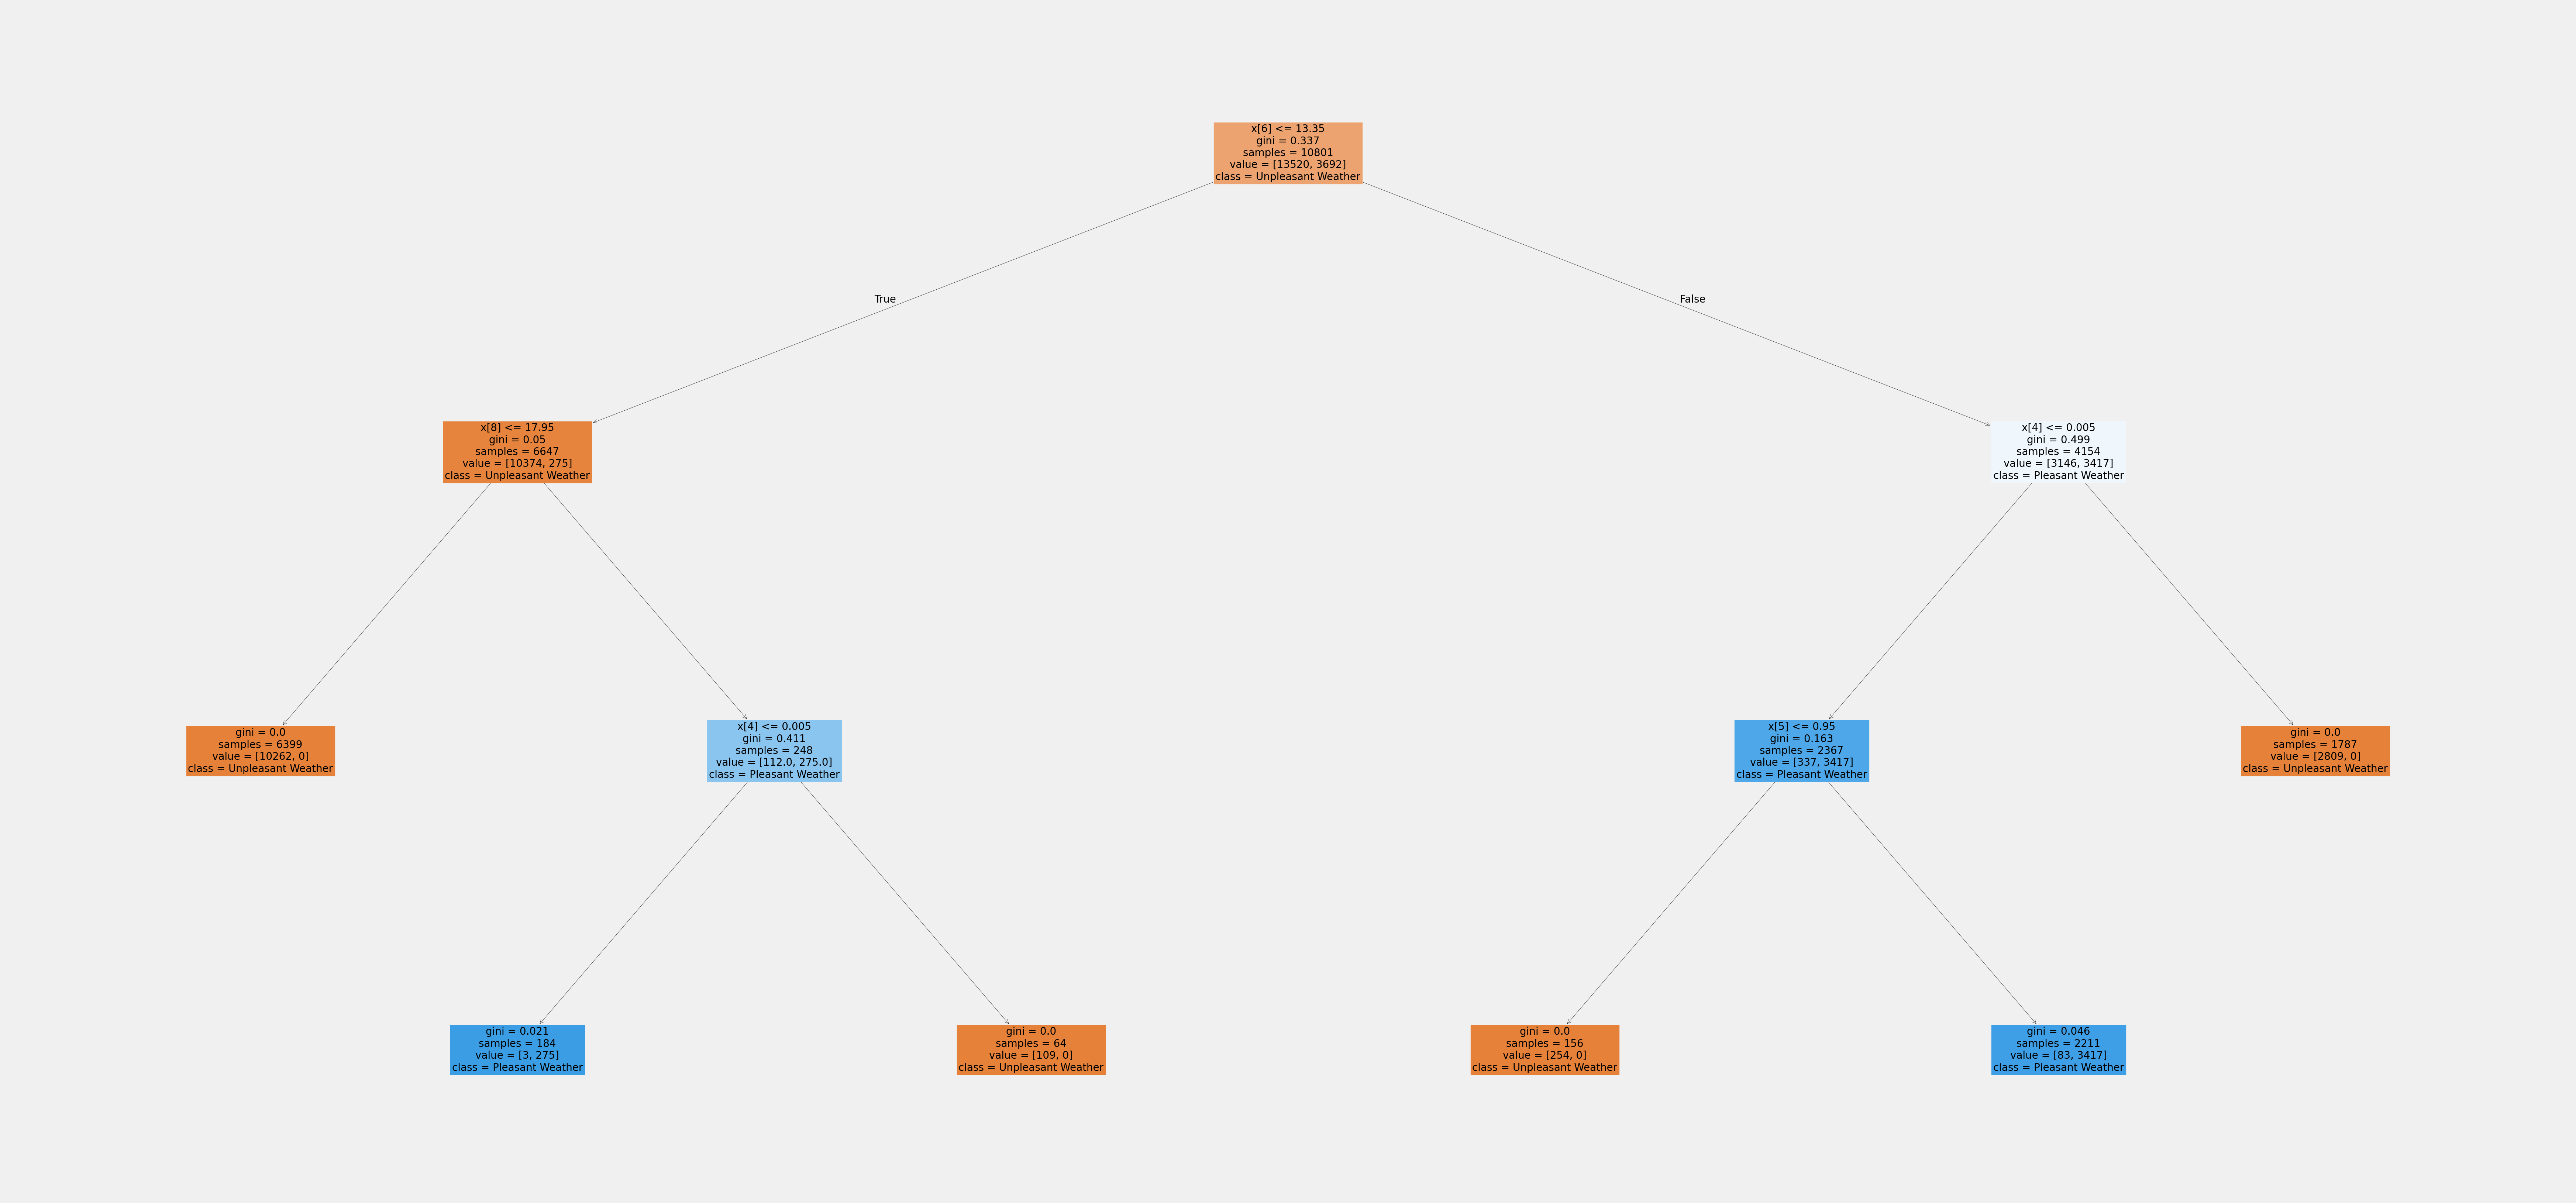

In [79]:
# Plot random forrest
fig = plt.figure(figsize=(80,40))
plot_tree(clf4.estimators_[15],
          class_names=class_names, 
          filled=True, 
          fontsize=20)
plt.show()

In [80]:
fig.savefig(os.path.join(path, '04 Visualizations', 'random_forest_Dusseldorf_optimized.png'),bbox_inches='tight')

In [81]:
# Retrieve feature importances from the trained model

newarray = clf4.feature_importances_
print(clf4.feature_importances_.shape)
newarray

(9,)


array([0.03396479, 0.00051007, 0.00048224, 0.02402154, 0.43037285,
       0.04553933, 0.06161901, 0.        , 0.40349016])

In [82]:
# Create a list of weather features
# Create a list of the columns containing "Basel" in their names

dus_list = list(x for x in df.columns if x.find('DUSSELDORF') >=0)
wf_list = [feature.replace('DUSSELDORF_', '') for feature in dus_list]
wf_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [83]:
important = pd.Series(newarray, index = wf_list)
important = important.sort_values(ascending = False)
important

precipitation       0.430373
temp_max            0.403490
temp_mean           0.061619
sunshine            0.045539
cloud_cover         0.033965
global_radiation    0.024022
humidity            0.000510
pressure            0.000482
temp_min            0.000000
dtype: float64

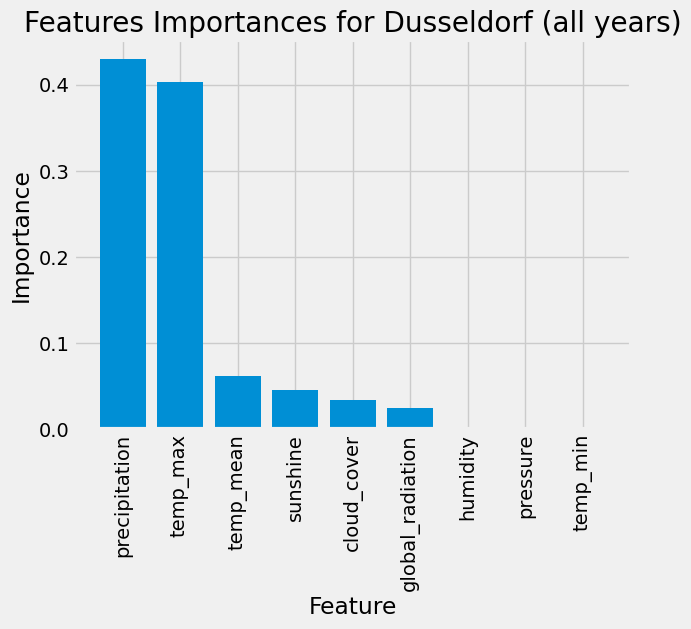

In [84]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')

# Get sorted values and lables from 'important' series
newarray_sorted = important.values
wf_list_sorted = important.index
# list of x locations for plotting
x_values = list(range(len(newarray)))

plt.bar(x_values, newarray_sorted, orientation = 'vertical')
plt.xticks(x_values, wf_list_sorted, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Dusseldorf (all years)');

plt.savefig(os.path.join(path, '04 Visualizations', 'Dusseldorf_feature_importances_optimized.png'), bbox_inches='tight')
plt.show()